# Cross Validating a Linear Regression Model

__Team Members:__ Surya Suresh Sriraman, Nivetha Sivakumar, Aravind Raju

# Introduction

Accurately predicting the weight of passenger vehicles holds significant value across various industries, including automotive design, transportation logistics, safety regulations, and emissions control. In this assignment, we'll delve into the realm of linear regression modeling to construct a robust model capable of predicting vehicle weight with accuracy and reliability.

__Data Source:__<br>

- __Source:__ UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Automobile)
- __Observations:__ 205
- __Response Variable:__ curb-weight<br>
- __Explanatory Variables:__ height, width, length, wheel-base, engine-size, horsepower, peak-rpm, and city-mpg

__Approach:__<br>
- __Data Loading and Preparation:__ Utilize Python and the Pandas library to load the data into a suitable DataFrame.
- __Exploratory Data Analysis (EDA):__ Statistical analysis to uncover central tendencies, distribution patterns, and potential relationships between variables. Use Supporting Visualizations.
- __Model Development and Evaluation:__
    - Construct a five linear regression models, each incorporating at four explanatory variables strategically selected based on EDA findings.
    - Employ K-fold cross-validation to rigorously evaluate the performance of each model, ensuring generalizability and mitigating overfitting.
    - Compare model performance using R-squared scores derived from the cross-validation process.
    - Select the optimal model based on the highest average R-squared value.


# Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Loading Data

In [3]:
# Specify columns to load
column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style","drive-wheels",
                "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-cylinders", "engine-size",
                "fuel-system", "bore","stroke", "compression-ratio", "horse-power", "peak-rpm", "city-mpg","highway-mpg", "price"]

usecols = ['height', 'width', 'length', 'wheel-base','engine-size', 'horse-power', 'peak-rpm', 'city-mpg', 'curb-weight']

url = "https://raw.githubusercontent.com/s-surya-s/DAV-6150/main/M2_Data.csv"

# Load data into Pandas DataFrame with specific columns
auto_df = pd.read_csv(url, sep = ",", names = column_names , usecols = usecols)

# sanity check - make sure data was read in as expected
auto_df.head()

,wheel-base,length,width,height,curb-weight,engine-size,horse-power,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,2548,130,111,5000,21
1,88.6,168.8,64.1,48.8,2548,130,111,5000,21
2,94.5,171.2,65.5,52.4,2823,152,154,5000,19
3,99.8,176.6,66.2,54.3,2337,109,102,5500,24
4,99.4,176.6,66.4,54.3,2824,136,115,5500,18


# Data Cleaning

## Check Datatypes

In [4]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel-base   205 non-null    float64
 1   length       205 non-null    float64
 2   width        205 non-null    float64
 3   height       205 non-null    float64
 4   curb-weight  205 non-null    int64  
 5   engine-size  205 non-null    int64  
 6   horse-power  205 non-null    object 
 7   peak-rpm     205 non-null    object 
 8   city-mpg     205 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 14.5+ KB


__Note:__ Horsepower and peak-rpm are labeled as objects, but they are continuous variables. Upon exploration, it was discovered that they contain anonymous characters such as '?'. To proceed with exploratory data analysis (EDA), these characters should be removed using regex.

### Handling anonymous characters

In [5]:
auto_df['horse-power'] = pd.to_numeric(auto_df['horse-power'].replace('?', pd.NA))
auto_df['peak-rpm'] = pd.to_numeric(auto_df['peak-rpm'].replace('?', pd.NA))
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   wheel-base   205 non-null    float64
 1   length       205 non-null    float64
 2   width        205 non-null    float64
 3   height       205 non-null    float64
 4   curb-weight  205 non-null    int64  
 5   engine-size  205 non-null    int64  
 6   horse-power  203 non-null    float64
 7   peak-rpm     203 non-null    float64
 8   city-mpg     205 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 14.5 KB


## Check Duplicates

In [6]:
duplicated_rows = auto_df.duplicated().sum()
print("Number of Duplicated entries :", duplicated_rows)

Number of Duplicated entries : 14


### Handling Duplicates

In [7]:
print("Size of the data before Duplicate removal : ", len(auto_df))
#Dropping the duplicates
auto_df = auto_df.drop_duplicates()
print("Size of the data after Duplicate removal : ", len(auto_df))

Size of the data before Duplicate removal :  205
Size of the data after Duplicate removal :  191


# Exploratory Data Analysis

In [8]:
auto_df.describe()

,wheel-base,length,width,height,curb-weight,engine-size,horse-power,peak-rpm,city-mpg
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,189.000000,189.000000,191.000000
mean,98.831414,174.240314,65.945026,53.796859,2559.178010,127.015707,104.195767,5115.608466,25.267016
std,5.974327,12.341931,2.166725,2.390329,518.355263,41.202641,39.794269,476.028869,6.578026
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,48.000000,4150.000000,13.000000
25%,94.500000,166.550000,64.150000,52.000000,2157.000000,97.500000,70.000000,4800.000000,19.000000
50%,97.000000,173.200000,65.500000,54.100000,2425.000000,120.000000,95.000000,5200.000000,24.000000
75%,102.400000,183.500000,66.900000,55.550000,2953.000000,143.000000,120.000000,5500.000000,30.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,288.000000,6600.000000,49.000000


## Univariate Analysis

In [9]:
#UNIVARIATE ANALYSIS

def Univariate_EDA(col, df = auto_df):    
    '''Performs Univariate Analysis
    Args:    
    col: Column in the df to perform Univariate analysis    
    type: Type of Univariate analysis
    df: Dataframe to perform Univariate analysis (default value - customer_eda) 
    Returns:
    None
    '''
    
    df = df[df[col].notnull()]
    
    # get summary statistics
    print('Summary Statistics')
    display(df[col].describe())
        
    plt.figure(figsize=(6,3))
    plt.suptitle(col)
    
    plt.subplot(1,2,1)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')

    plt.subplot(1,2,2)
    sns.boxplot(data= df, y=col, color='green')  
    
    # Display plot
    plt.tight_layout()
    plt.show()    
    
    #Outlier Treatment
    
    # finding the quartiles
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    med = np.median(df[col])

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    # boxplot of data within the whisker
    arr = df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    if len(arr) != len(df[col]):
        
        print('Summary Statistics (Outliers Treated)')    
        display(df[col][(df[col] >= lower_bound) & (df[col] <= upper_bound)].describe())
    
        plt.figure(figsize=(6,3))
        plt.suptitle(col+'(Outliers Treated)')
        
        plt.subplot(1,2,1)
        sns.histplot(x=arr, kde=True, color='skyblue')

        plt.subplot(1,2,2)
        sns.boxplot(y=arr, color='green', showfliers=False) 
                
        # Display plot
        plt.tight_layout()
        plt.show()       
        
    return None     


### Height

Summary Statistics


count    191.000000
mean      53.796859
std        2.390329
min       47.800000
25%       52.000000
50%       54.100000
75%       55.550000
max       59.800000
Name: height, dtype: float64

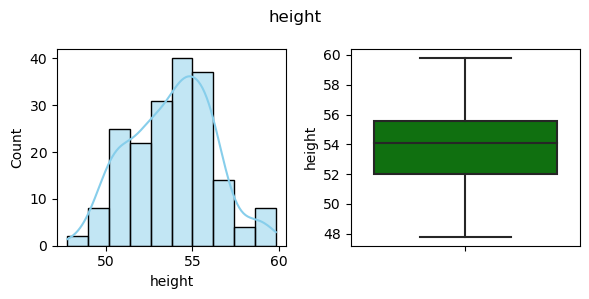

In [10]:
Univariate_EDA('height')

__Insights:__

The summary statistics, histogram, and boxplot reveal that the median value of height exceeds the mean. The plot demonstrates left skewness and the values ranges between 47 and 59.

### Width

Summary Statistics


count    191.000000
mean      65.945026
std        2.166725
min       60.300000
25%       64.150000
50%       65.500000
75%       66.900000
max       72.300000
Name: width, dtype: float64

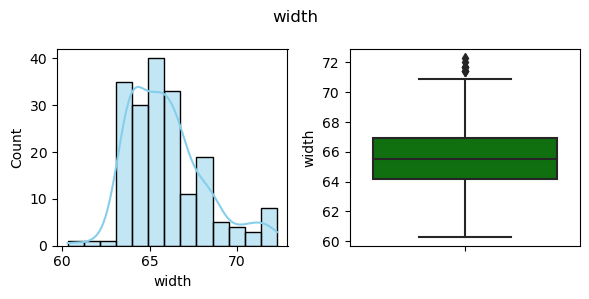

Summary Statistics (Outliers Treated)


count    183.000000
mean      65.693443
std        1.837838
min       60.300000
25%       64.000000
50%       65.500000
75%       66.500000
max       70.900000
Name: width, dtype: float64

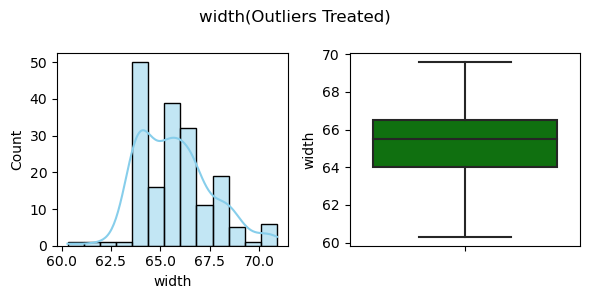

In [11]:
Univariate_EDA('width')

__Insights:__

The summary statistics, histogram, and boxplot reveal that the mean value of height exceeds the median. The plot demonstrates right skewness and the values ranges between 60 and 72.3.

After Outlier treatment, the value ranges between 60 and 70.9.

### Length

Summary Statistics


count    191.000000
mean     174.240314
std       12.341931
min      141.100000
25%      166.550000
50%      173.200000
75%      183.500000
max      208.100000
Name: length, dtype: float64

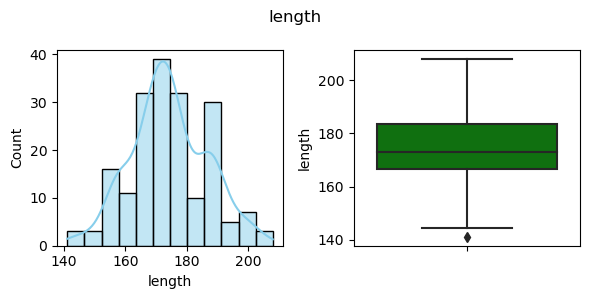

Summary Statistics (Outliers Treated)


count    190.000000
mean     174.414737
std       12.136211
min      144.600000
25%      166.800000
50%      173.200000
75%      183.500000
max      208.100000
Name: length, dtype: float64

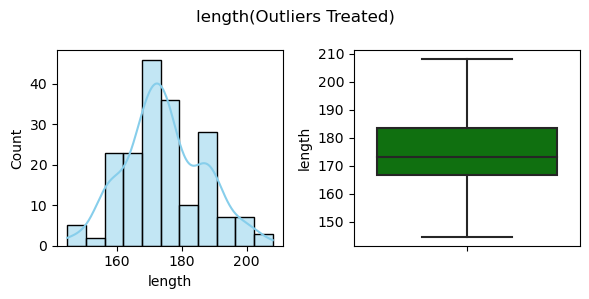

In [12]:
Univariate_EDA('length')

__Insights:__

The summary statistics, histogram, and boxplot reveal that the mean value of length exceeds the median. The plot demonstrates right skewness and the values ranges between 141.1 and 208.1.

After Outlier treatment, the value ranges between 144.6 and 208.1.

### Wheel Base

Summary Statistics


count    191.000000
mean      98.831414
std        5.974327
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheel-base, dtype: float64

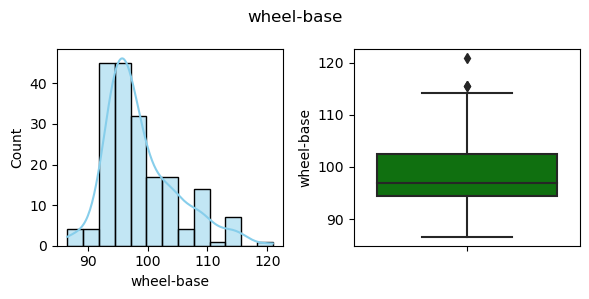

Summary Statistics (Outliers Treated)


count    188.000000
mean      98.535638
std        5.528609
min       86.600000
25%       94.500000
50%       96.950000
75%      101.400000
max      114.200000
Name: wheel-base, dtype: float64

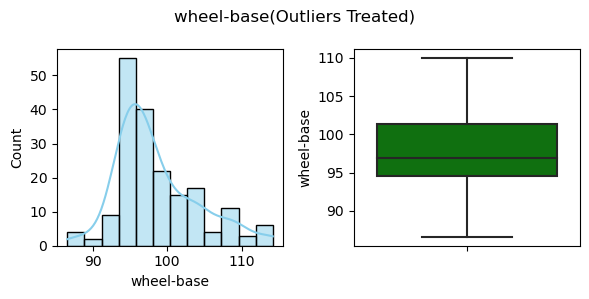

In [13]:
Univariate_EDA('wheel-base')

__Insights:__

The summary statistics, histogram, and boxplot reveal that the mean value of wheel-base exceeds the median. The plot demonstrates right skewness and the values ranges between 86 and 120.

After Outlier treatment, the value ranges between 86 and 114.

### Engine Size

Summary Statistics


count    191.000000
mean     127.015707
std       41.202641
min       61.000000
25%       97.500000
50%      120.000000
75%      143.000000
max      326.000000
Name: engine-size, dtype: float64

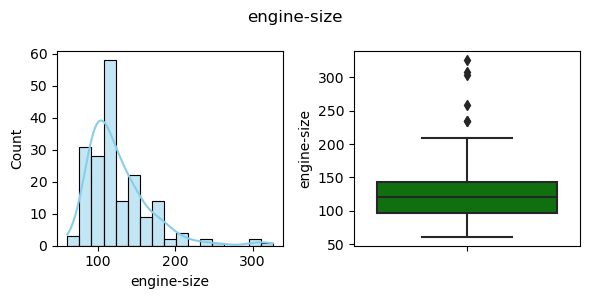

Summary Statistics (Outliers Treated)


count    185.000000
mean     122.140541
std       30.789992
min       61.000000
25%       97.000000
50%      110.000000
75%      141.000000
max      209.000000
Name: engine-size, dtype: float64

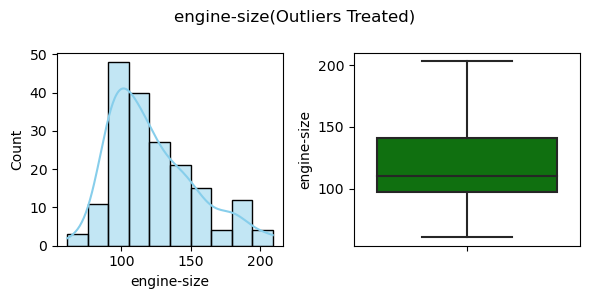

In [14]:
Univariate_EDA('engine-size')

__Insights:__

The summary statistics, histogram, and boxplot reveal that the mean value of engine-size exceeds the median. The plot demonstrates right skewness and the values ranges between 61 and 326.

After Outlier treatment, the value ranges between 61 and 209.

### Horse Power

Summary Statistics


count    189.000000
mean     104.195767
std       39.794269
min       48.000000
25%       70.000000
50%       95.000000
75%      120.000000
max      288.000000
Name: horse-power, dtype: float64

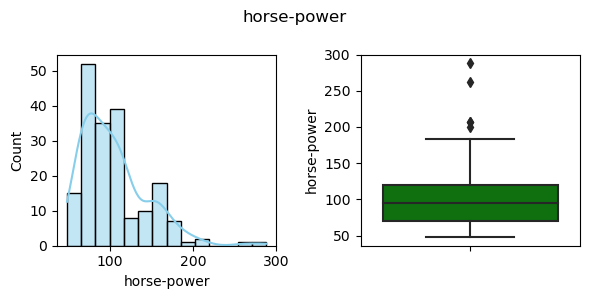

Summary Statistics (Outliers Treated)


count    184.000000
mean     100.701087
std       33.589011
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      184.000000
Name: horse-power, dtype: float64

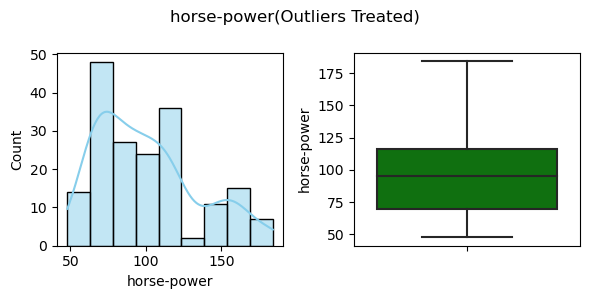

In [15]:
Univariate_EDA('horse-power')

__Insights:__

The summary statistics, histogram, and boxplot reveal that the mean value of horse-power exceeds the median. The plot demonstrates right skewness and the values ranges between 48 and 288.

After Outlier treatment, the value ranges between 48 and 184.

### Peak RPM

Summary Statistics


count     189.000000
mean     5115.608466
std       476.028869
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64

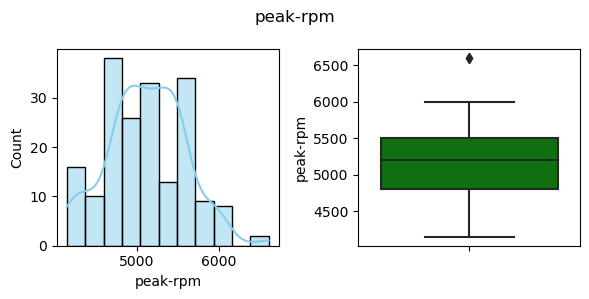

Summary Statistics (Outliers Treated)


count     187.000000
mean     5099.732620
std       452.873066
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6000.000000
Name: peak-rpm, dtype: float64

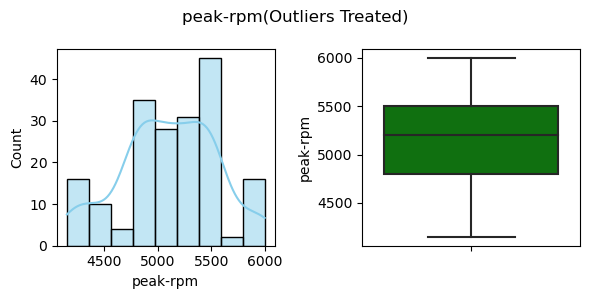

In [16]:
Univariate_EDA('peak-rpm')

__Insights:__

The summary statistics, histogram, and boxplot reveal that the median value of peak-rpm exceeds the mean. The plot demonstrates left skewness and the values ranges between 4150 and 6600.

After outlier treatment, the value ranges between 4150 and 6000

### City MPG

Summary Statistics


count    191.000000
mean      25.267016
std        6.578026
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: city-mpg, dtype: float64

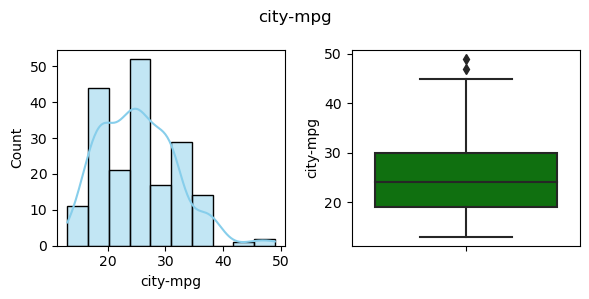

Summary Statistics (Outliers Treated)


count    189.000000
mean      25.026455
std        6.177717
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       45.000000
Name: city-mpg, dtype: float64

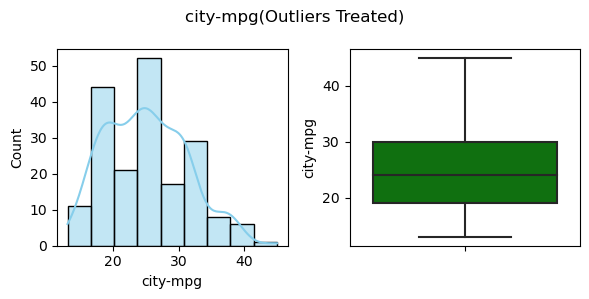

In [17]:
Univariate_EDA('city-mpg')

__Insights:__

The summary statistics, histogram, and boxplot reveal that the mean value of city-mpg exceeds the median. The plot demonstrates right skewness and the values ranges between 13 and 45.

### Curb Weight

Summary Statistics


count     191.000000
mean     2559.178010
std       518.355263
min      1488.000000
25%      2157.000000
50%      2425.000000
75%      2953.000000
max      4066.000000
Name: curb-weight, dtype: float64

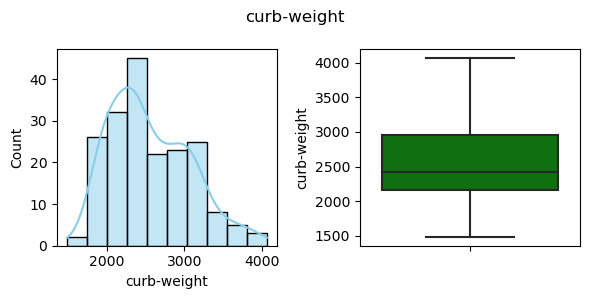

In [18]:
Univariate_EDA('curb-weight')

__Insights:__

The summary statistics, histogram, and boxplot reveal that the median value of curb-weight exceeds the mean. The plot demonstrates left skewness and the values ranges between 1488 and 4066.

## Bivariate Analysis

<Figure size 1000x1000 with 0 Axes>

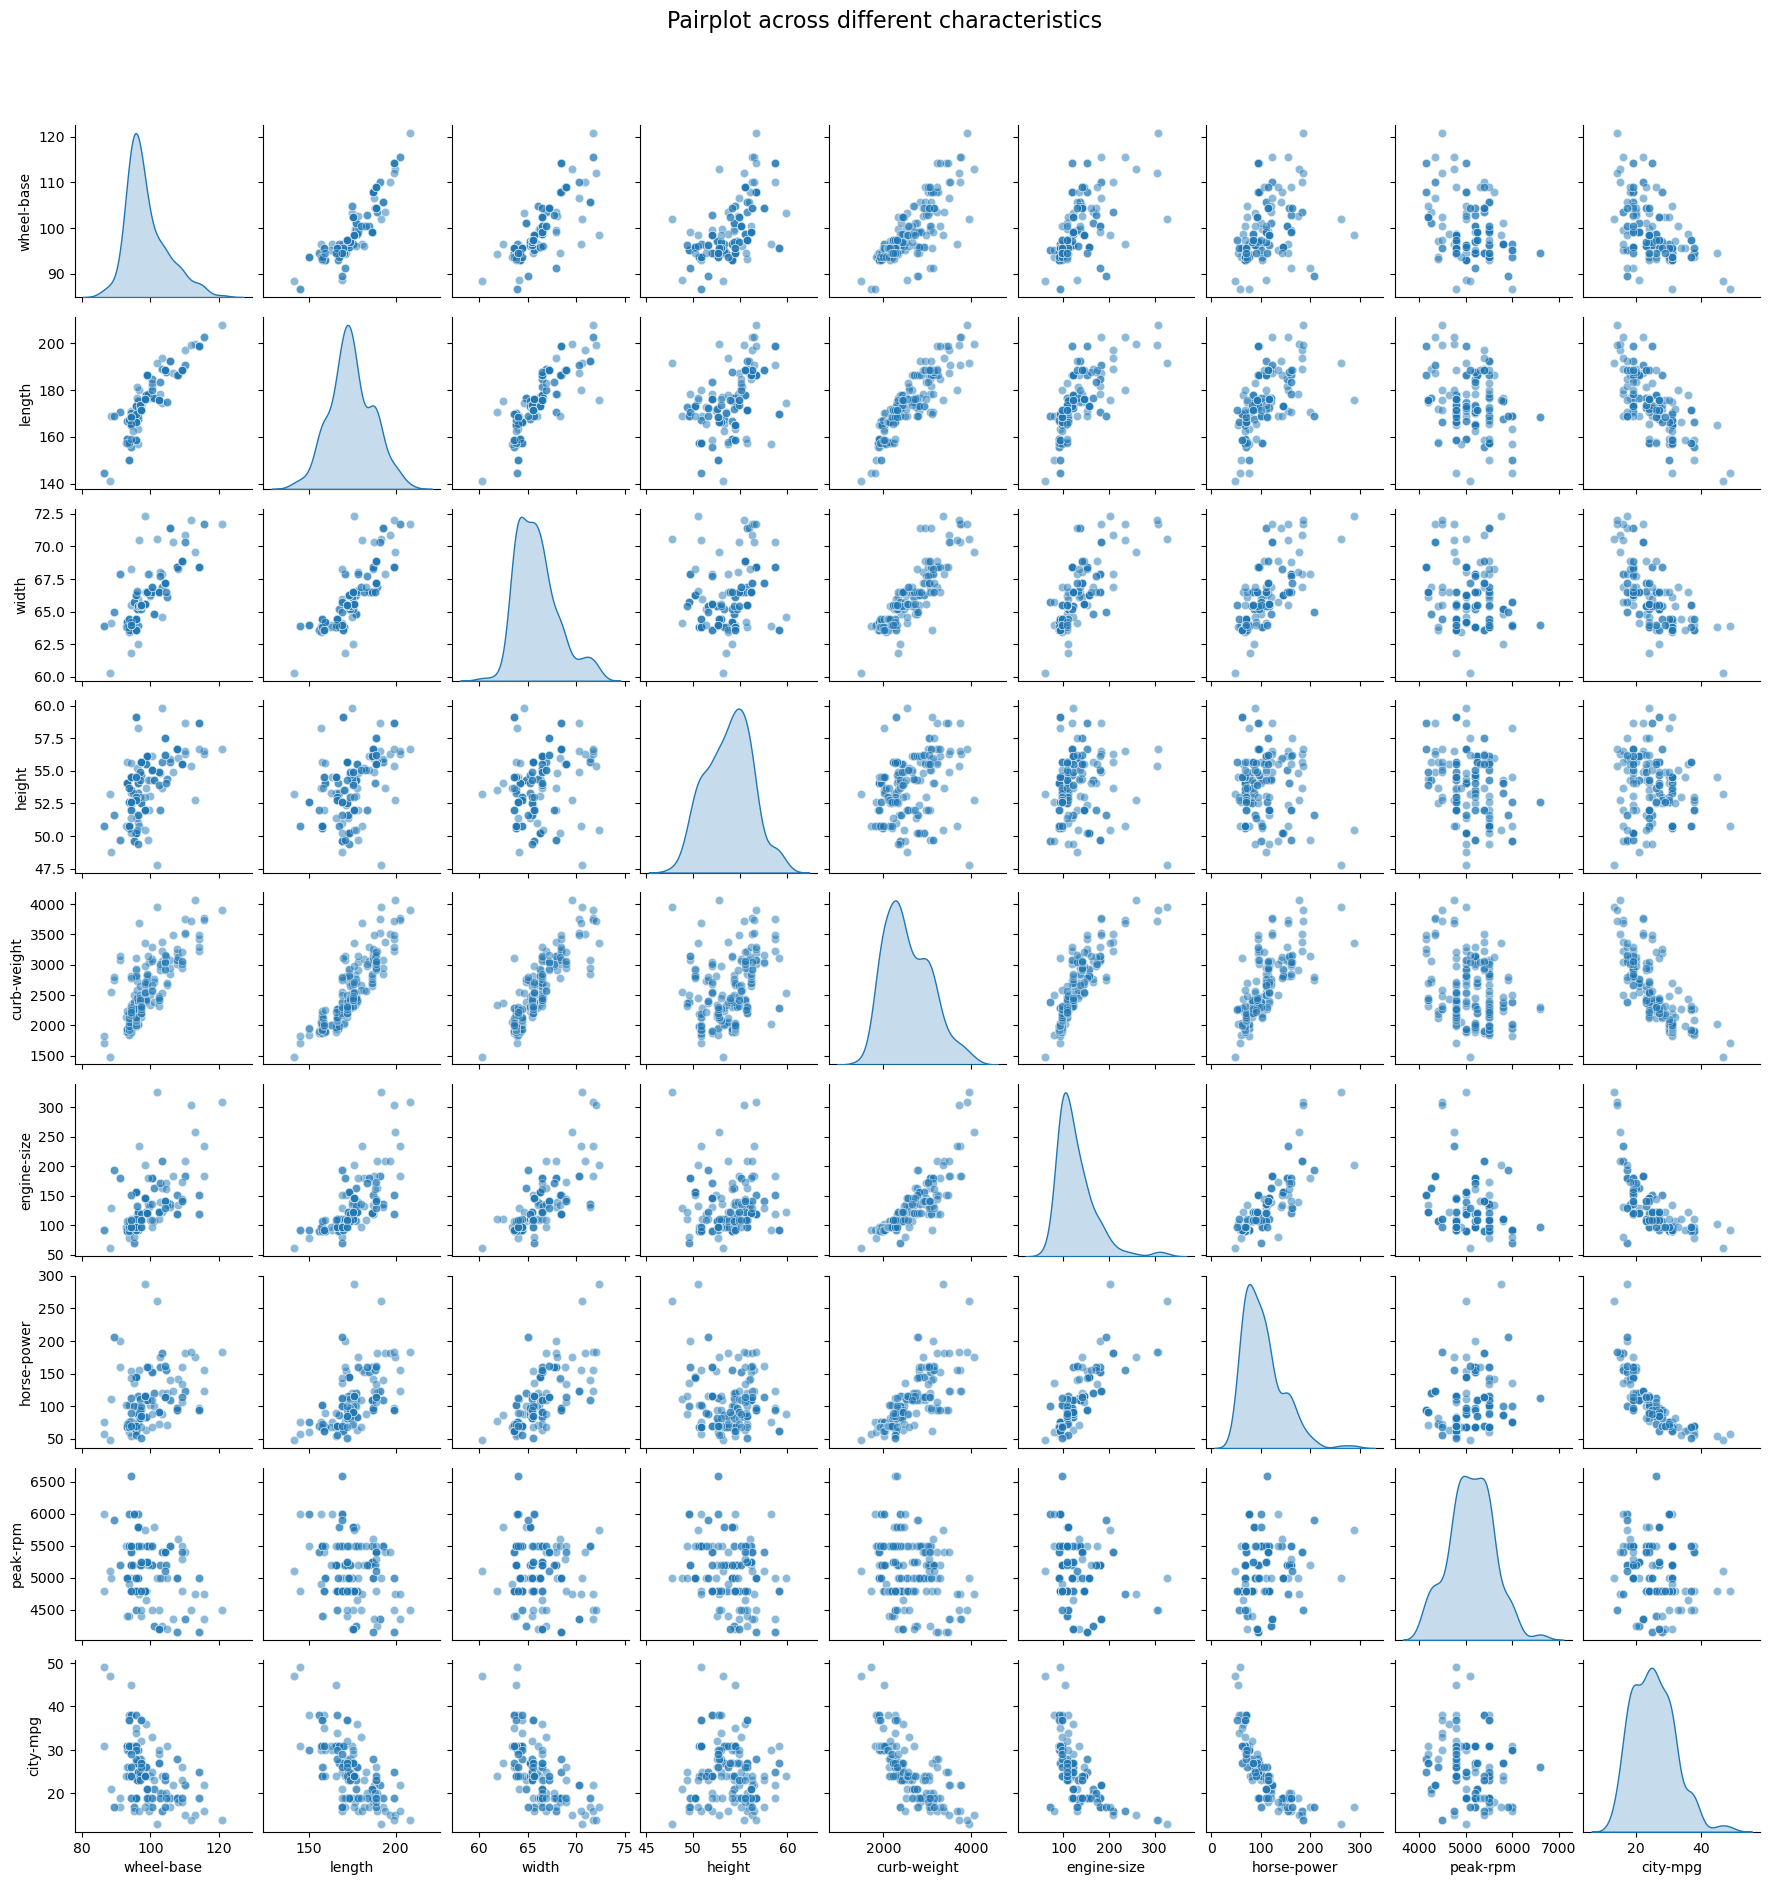

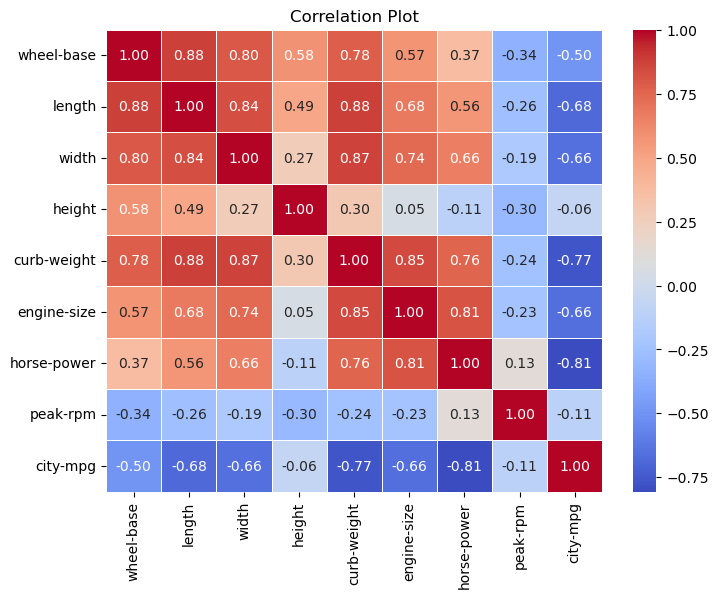

In [19]:
plt.figure(figsize=(10,10))

sns.pairplot(auto_df, diag_kind='kde', plot_kws={'alpha': 0.5}, height=2)
plt.suptitle('Pairplot across different characteristics', fontsize=16, y=1.05)
plt.show()  


# Calculate the correlation matrix
correlation_matrix = auto_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.show()

__Insights__ :

From the correlation plot, we can draw insights on correlation between the numeric variables. Absolute value of the correlation coefficient indicates the magnitude of the correlation, while + and - indicates the direction of correlation (positive and negative respectively). The stronger the correlation, the closer the correlation coefficient comes to ±1

Variables having strong correlation with the target variable (curb-weight) are
- Length
- Width
- Engine-Size
- Wheel-Base
- Horsepower
- city_mpg

Other variables with strong correlation are
- Horsepower - City mpg
- Horsepower - Engine Size
- Wheel-Base - Width
- Wheel-Base - Length


# Handling Null Values

In [20]:
auto_df.isna().sum()

wheel-base     0
length         0
width          0
height         0
curb-weight    0
engine-size    0
horse-power    2
peak-rpm       2
city-mpg       0
dtype: int64

## Horsepower

In [21]:
null_hp = auto_df[auto_df['horse-power'].isnull()]
null_hp

,wheel-base,length,width,height,curb-weight,engine-size,horse-power,peak-rpm,city-mpg
130,96.1,181.5,66.5,55.2,2579,132,NaN,NaN,23
131,96.1,176.8,66.6,50.5,2460,132,NaN,NaN,23


From Bivariate Analysis, we observed that Horsepower is highly correlated with engine size. So, impute the null values with median horsepower of cars with engine size that falls in same quartile.
 
From Univariate Analysis, we observed that engine size 132 falls under Q3 (120 - 143)

In [22]:
auto_df['horse-power'] = auto_df['horse-power'].fillna(auto_df[(auto_df['engine-size'] > 120) & (auto_df['engine-size'] < 143)]['horse-power'].median())

#Sanity Check
auto_df.loc[null_hp.index]

,wheel-base,length,width,height,curb-weight,engine-size,horse-power,peak-rpm,city-mpg
130,96.1,181.5,66.5,55.2,2579,132,110.0,NaN,23
131,96.1,176.8,66.6,50.5,2460,132,110.0,NaN,23


## Peak rpm

In [23]:
null_rpm = auto_df[auto_df['peak-rpm'].isnull()]
null_rpm

,wheel-base,length,width,height,curb-weight,engine-size,horse-power,peak-rpm,city-mpg
130,96.1,181.5,66.5,55.2,2579,132,110.0,NaN,23
131,96.1,176.8,66.6,50.5,2460,132,110.0,NaN,23


From Bivariate Analysis, we observed that Peak rpm is highly correlated with Horsepower. So, impute the null values with median peak rpm of cars with Horsepower that falls in same quartile.
 
From Univariate Analysis, we observed that horse power 110 falls under Q3 (95 - 118)

In [24]:
auto_df['peak-rpm'] = auto_df['peak-rpm'].fillna(auto_df[(auto_df['horse-power'] > 95) & (auto_df['horse-power'] < 118)]['peak-rpm'].median())

#Sanity Check
auto_df.loc[null_rpm.index]

,wheel-base,length,width,height,curb-weight,engine-size,horse-power,peak-rpm,city-mpg
130,96.1,181.5,66.5,55.2,2579,132,110.0,5400.0,23
131,96.1,176.8,66.6,50.5,2460,132,110.0,5400.0,23


## Sanity Check

In [25]:
auto_df.isna().sum()

wheel-base     0
length         0
width          0
height         0
curb-weight    0
engine-size    0
horse-power    0
peak-rpm       0
city-mpg       0
dtype: int64

# Regression Model Construction & Evaluation

## Data Splitting

In [26]:
# Explanatory Variable
X = auto_df.copy().drop('curb-weight', axis=1)
X.head(2)

,wheel-base,length,width,height,engine-size,horse-power,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,130,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,152,154.0,5000.0,19


In [27]:
# Response Variable
y = auto_df['curb-weight']
y.head(2)

0    2548
2    2823
Name: curb-weight, dtype: int64

In [28]:
# Split the data into training and testing subsets; setting 30% of data for testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [29]:
#Sanity Check
print(100.00 * len(X_test) / (len(X_train)+len(X_test)))

30.36649214659686


## Cross Validation

Set "K" = 10, a value that has been found through experimentation to generally result in a model with low bias and modest variance.

In practice, "K" is often set to a value of 5 or 10 since these values have been shown to produce testing error rate estimates that exhibit neither high bias nor very high variance (see "An Introduction to Statistical Learning", page 184, James, Witten, Hastie, and Tibshirani, ISBN-13: 978-1461471370).

In [30]:
def cross_val(features, X_train = X_train, y_train = y_train, k = 10):
    model = LinearRegression()

    scores = cross_val_score(model, X_train[features], y_train, cv=k)
    
    return np.mean(scores)

__Reason for choosing the explanatory features__ : After conducting Exploratory Data Analysis (EDA), it becomes evident that the 'curb_weight' feature exhibits a strong correlation with variables such as 'length,' 'width,' 'wheel-base,' 'engine-size,' 'horsepower,' and 'city-mpg.' Fitting the model with different combinations of these features will enable us to discern the individual contributions of each variable in predicting the curb weight. This analysis aims to identify which specific features play a more significant role in predicting the vehicle's weight.

In [31]:
model_scores ={}

#model 1
model_scores['Model 1'] = cross_val(['length', 'width', 'wheel-base','engine-size'])

#model 2
model_scores['Model 2'] = cross_val(['length', 'width','horse-power', 'city-mpg'])

#model 3
model_scores['Model 3'] = cross_val(['horse-power', 'city-mpg', 'wheel-base','engine-size'])

#model 4
model_scores['Model 4'] = cross_val(['horse-power', 'length', 'wheel-base','engine-size'])

#model 5
model_scores['Model 5'] = cross_val(['horse-power', 'width', 'wheel-base','engine-size'])

print('Our 10-fold cross validation shows the following cross validated R^2 values\n')
    
model_scores_df = pd.DataFrame(list(model_scores.items()), columns=['Model', 'Score']).set_index('Model')

display(model_scores_df)

print("{} appears to perform better than other models based on R-squared scores".format(model_scores_df['Score'].idxmax()))

Our 5-fold cross validation shows the following cross validated R^2 values



,Score
Model,
Model 1,0.825749
Model 2,0.817115
Model 3,0.813359
Model 4,0.837986
Model 5,0.804578


Model 4 appears to perform better than other models based on R-squared scores


# Conclusion

In conclusion, we explored the use of linear regression to predict the weight of passenger vehicles with promising accuracy. 

Analyzing data from the UC Irvine Automobile dataset, we identified strong relationships between weight and attributes like engine size, wheelbase, length, width, horsepower and city-mpg. 

Based on these insights, five linear regression models were constructed and evaluated.

The model incorporating horse power, length, wheel base,engine size achieved the highest average R-squared score of 0.83, demonstrating its superiority in predicting vehicle weight.